In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
from sklearn.impute import SimpleImputer

%matplotlib inline

In [3]:
df = pd.read_excel(r'C:\Users\madu_\OneDrive\Documents\PROJETO_INTEGRADOR III-A\parte2_piIII.xlsx')
df

,febre,fadiga,mal-estar,dor de garganta,diagnostico
0,5.0,4.0,10.0,1.0,COVID
1,5.5,4.0,2.0,1.0,COVID
2,5.0,5.0,6.0,2.5,COVID
3,6.0,2.5,6.5,3.0,COVID
4,6.5,5.0,9.0,0.0,COVID
...,...,...,...,...,...
74,1.0,0.0,3.0,0.0,RINITE
75,1.5,0.0,3.0,1.0,RINITE
76,0.0,0.0,0.0,1.0,RINITE
77,0.0,0.0,0.0,1.5,RINITE


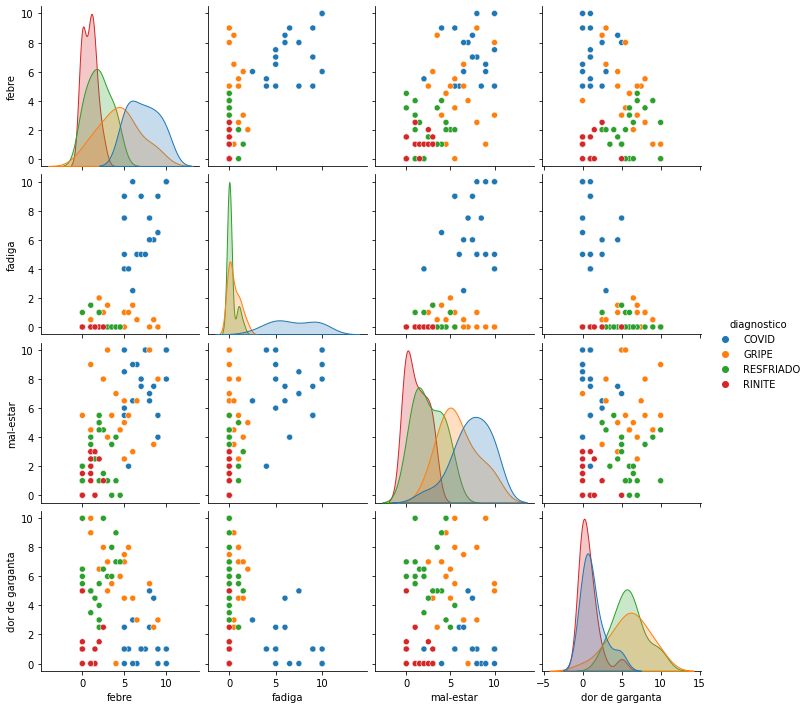

In [4]:
#Plotagem dos dados com os rótulos de diagnósticos
sb.pairplot(df, hue='diagnostico')

In [5]:
#Define o X de treinamento sem os rótulos
X = np.array(df.drop('diagnostico', axis=1))
X

array([[ 5. ,  4. , 10. ,  1. ],
       [ 5.5,  4. ,  2. ,  1. ],
       [ 5. ,  5. ,  6. ,  2.5],
       [ 6. ,  2.5,  6.5,  3. ],
       [ 6.5,  5. ,  9. ,  0. ],
       [ 7. ,  5. ,  8. ,  1. ],
       [ 7.5,  5. , 10. ,  1. ],
       [ 8. ,  7.5,  7. ,  5. ],
       [ 8.5,  6. ,  7.5,  4.5],
       [ 9. ,  6.5,  4. ,  0. ],
       [ 9. ,  9. ,  5.5,  1. ],
       [ 5. ,  7.5,  8.5,  0. ],
       [10. , 10. ,  8. ,  0. ],
       [10. , 10. , 10. ,  0. ],
       [10. , 10. , 10. ,  1. ],
       [ 8. ,  6. ,  6.5,  2.5],
       [ 6. , 10. ,  9. ,  0. ],
       [ 5. ,  9. ,  5.5,  1. ],
       [ 7. ,  9. ,  7.5,  1. ],
       [ 4. ,  0. ,  7. ,  0. ],
       [ 3. ,  0. , 10. ,  5. ],
       [ 3.5,  0. ,  5.5,  5.5],
       [ 4.5,  0. ,  4.5,  6. ],
       [ 5. ,  0. ,  6.5,  7.5],
       [ 5. ,  1. ,  2.5,  7. ],
       [ 2.5,  1. ,  8. ,  8. ],
       [ 1. ,  0.5,  4.5,  9. ],
       [ 0. ,  0. ,  5.5, 10. ],
       [ 1. ,  0. ,  9. , 10. ],
       [ 8. ,  0. , 10. ,  5.5],
       [ 9

In [6]:
#Configura o modelo kmeans com 4 clusters
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4, random_state=0)

In [7]:
#Substitui os valores NAN pelos mais frequentes
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

#Treina o modelo com os dados sem rótulos
X = imp.fit_transform(X)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [8]:
#Classificação que o modelo executou
kmeans.labels_

#Adiciona a coluna de classificação no dataframe
df['k-classes'] = kmeans.labels_

In [9]:
df.head

#Essas foram as classificações feitas pelo modelo k-means
#RINITE = classe 0
#GRIPE = 1
#COVID = classe 2
#RESDRIADO = classe 3

<bound method NDFrame.head of     febre  fadiga  mal-estar  dor de garganta diagnostico  k-classes
0     5.0     4.0       10.0              1.0       COVID          2
1     5.5     4.0        2.0              1.0       COVID          0
2     5.0     5.0        6.0              2.5       COVID          2
3     6.0     2.5        6.5              3.0       COVID          1
4     6.5     5.0        9.0              0.0       COVID          2
..    ...     ...        ...              ...         ...        ...
74    1.0     0.0        3.0              0.0      RINITE          0
75    1.5     0.0        3.0              1.0      RINITE          0
76    0.0     0.0        0.0              1.0      RINITE          0
77    0.0     0.0        0.0              1.5      RINITE          0
78    0.0     0.0        0.0              0.0      RINITE          0

[79 rows x 6 columns]>

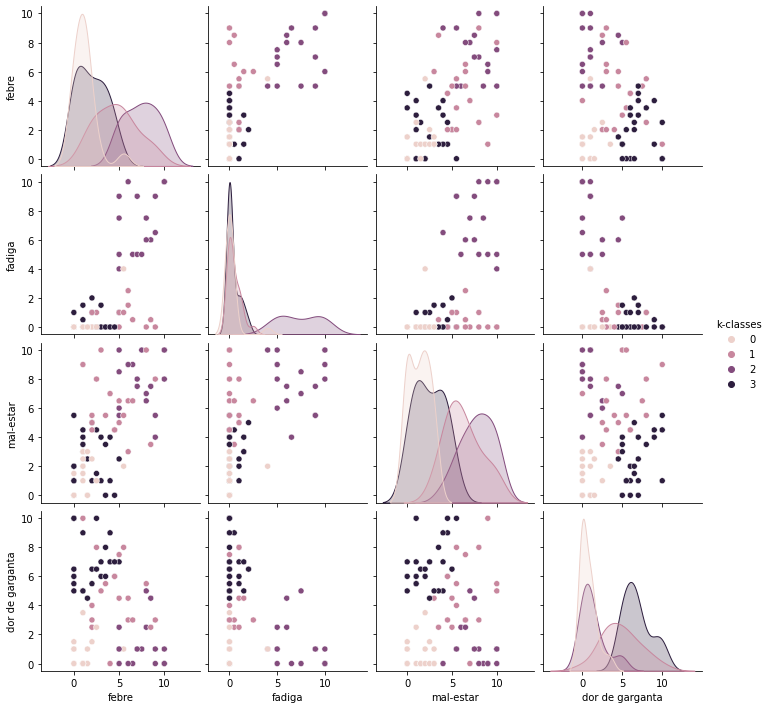

In [11]:
#Classificação do modelo k-means
sb.pairplot(df, hue='k-classes')